# Random Forest

In [35]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [2]:
# Load the dataset
data = pd.read_csv('/content/glass.csv')


In [3]:
data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# 1. Exploratory Data Analysis (EDA)
# Check basic information, missing values, and statistical summary
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    float64
dtypes: float64(10)
memory usage: 78.2 KB
None


In [6]:
print(data.describe())

               RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
25%      1.516522   12.907500    2.115000    1.190000   72.280000    0.122500   
50%      1.517680   13.300000    3.480000    1.360000   72.790000    0.555000   
75%      1.519157   13.825000    3.600000    1.630000   73.087500    0.610000   
max      1.533930   17.380000    4.490000    3.500000   75.410000    6.210000   

               Ca          Ba          Fe        Type  
count  214.000000  214.000000  214.000000  214.000000  
mean     8.956963    0.175047    0.057009    2.780374  
std      1.423153    0.497219    0.097439    2.103739  
min      5.430000    0.000000    0.000000    1

In [7]:
print(data.isnull().sum())  # Check for missing values

RI      785
Na      785
Mg      785
Al      785
Si      785
K       785
Ca      785
Ba      785
Fe      785
Type    785
dtype: int64


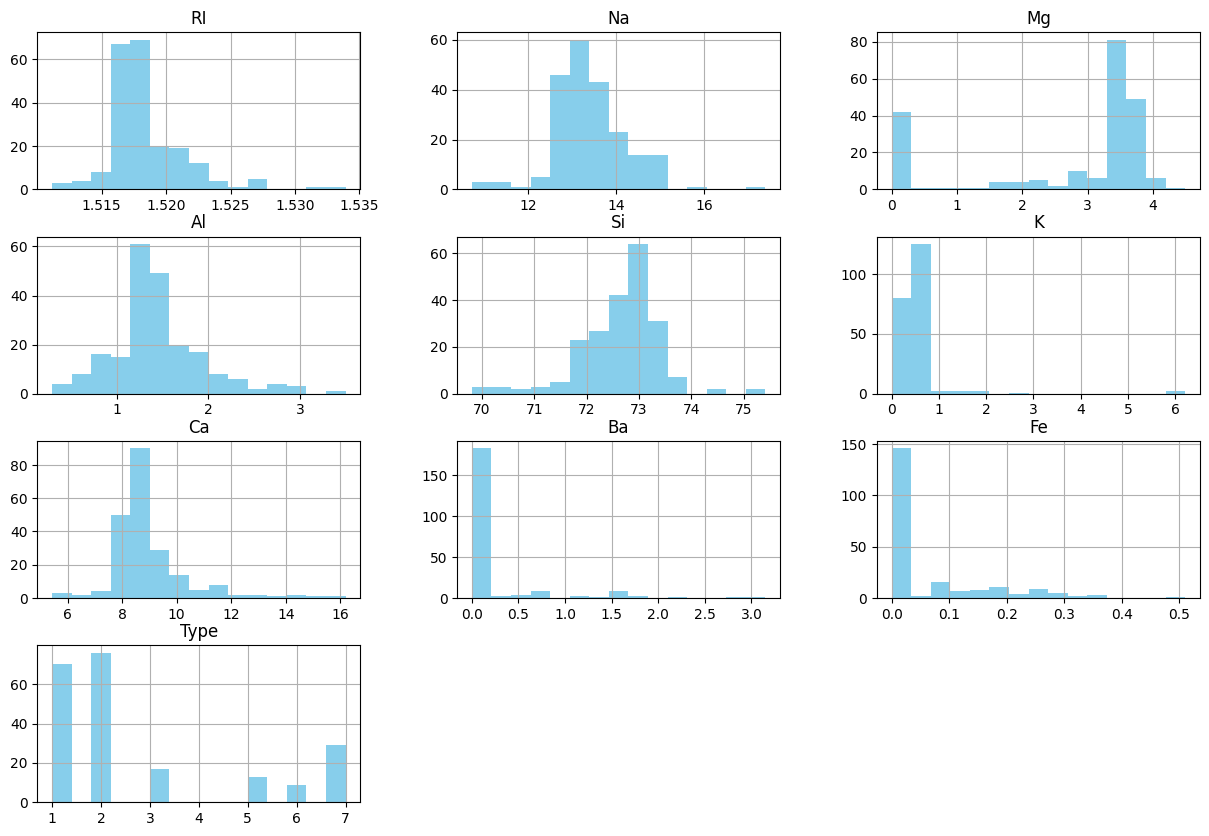

In [8]:
# 2. Data Visualization
# Histograms to visualize distribution
data.hist(bins=15, figsize=(15, 10), color='skyblue')
plt.show()

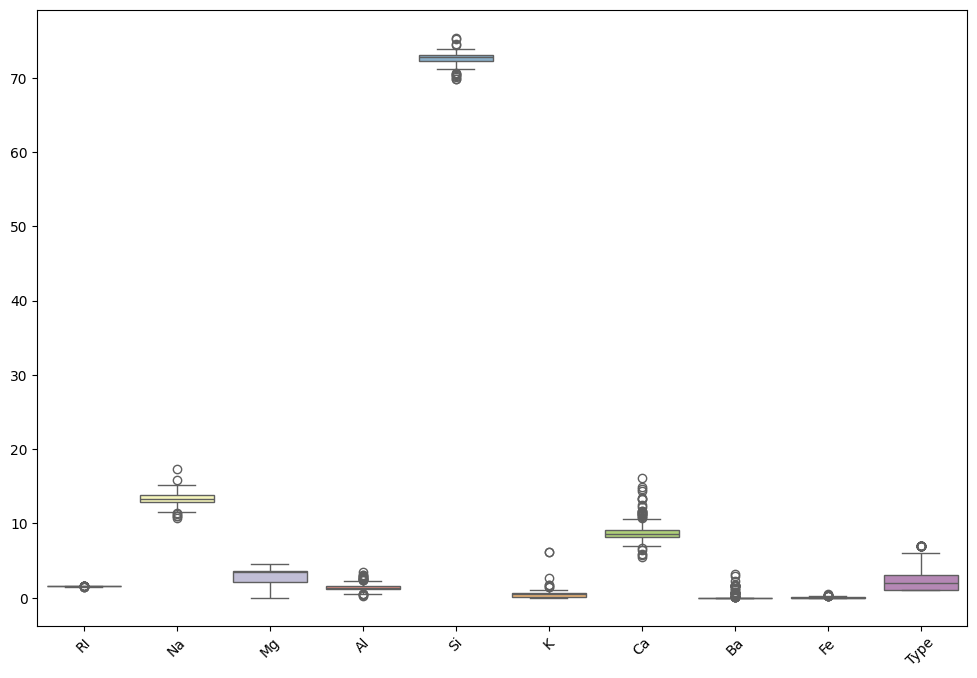

In [9]:
# Box plot to detect outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, palette="Set3")
plt.xticks(rotation=45)
plt.show()


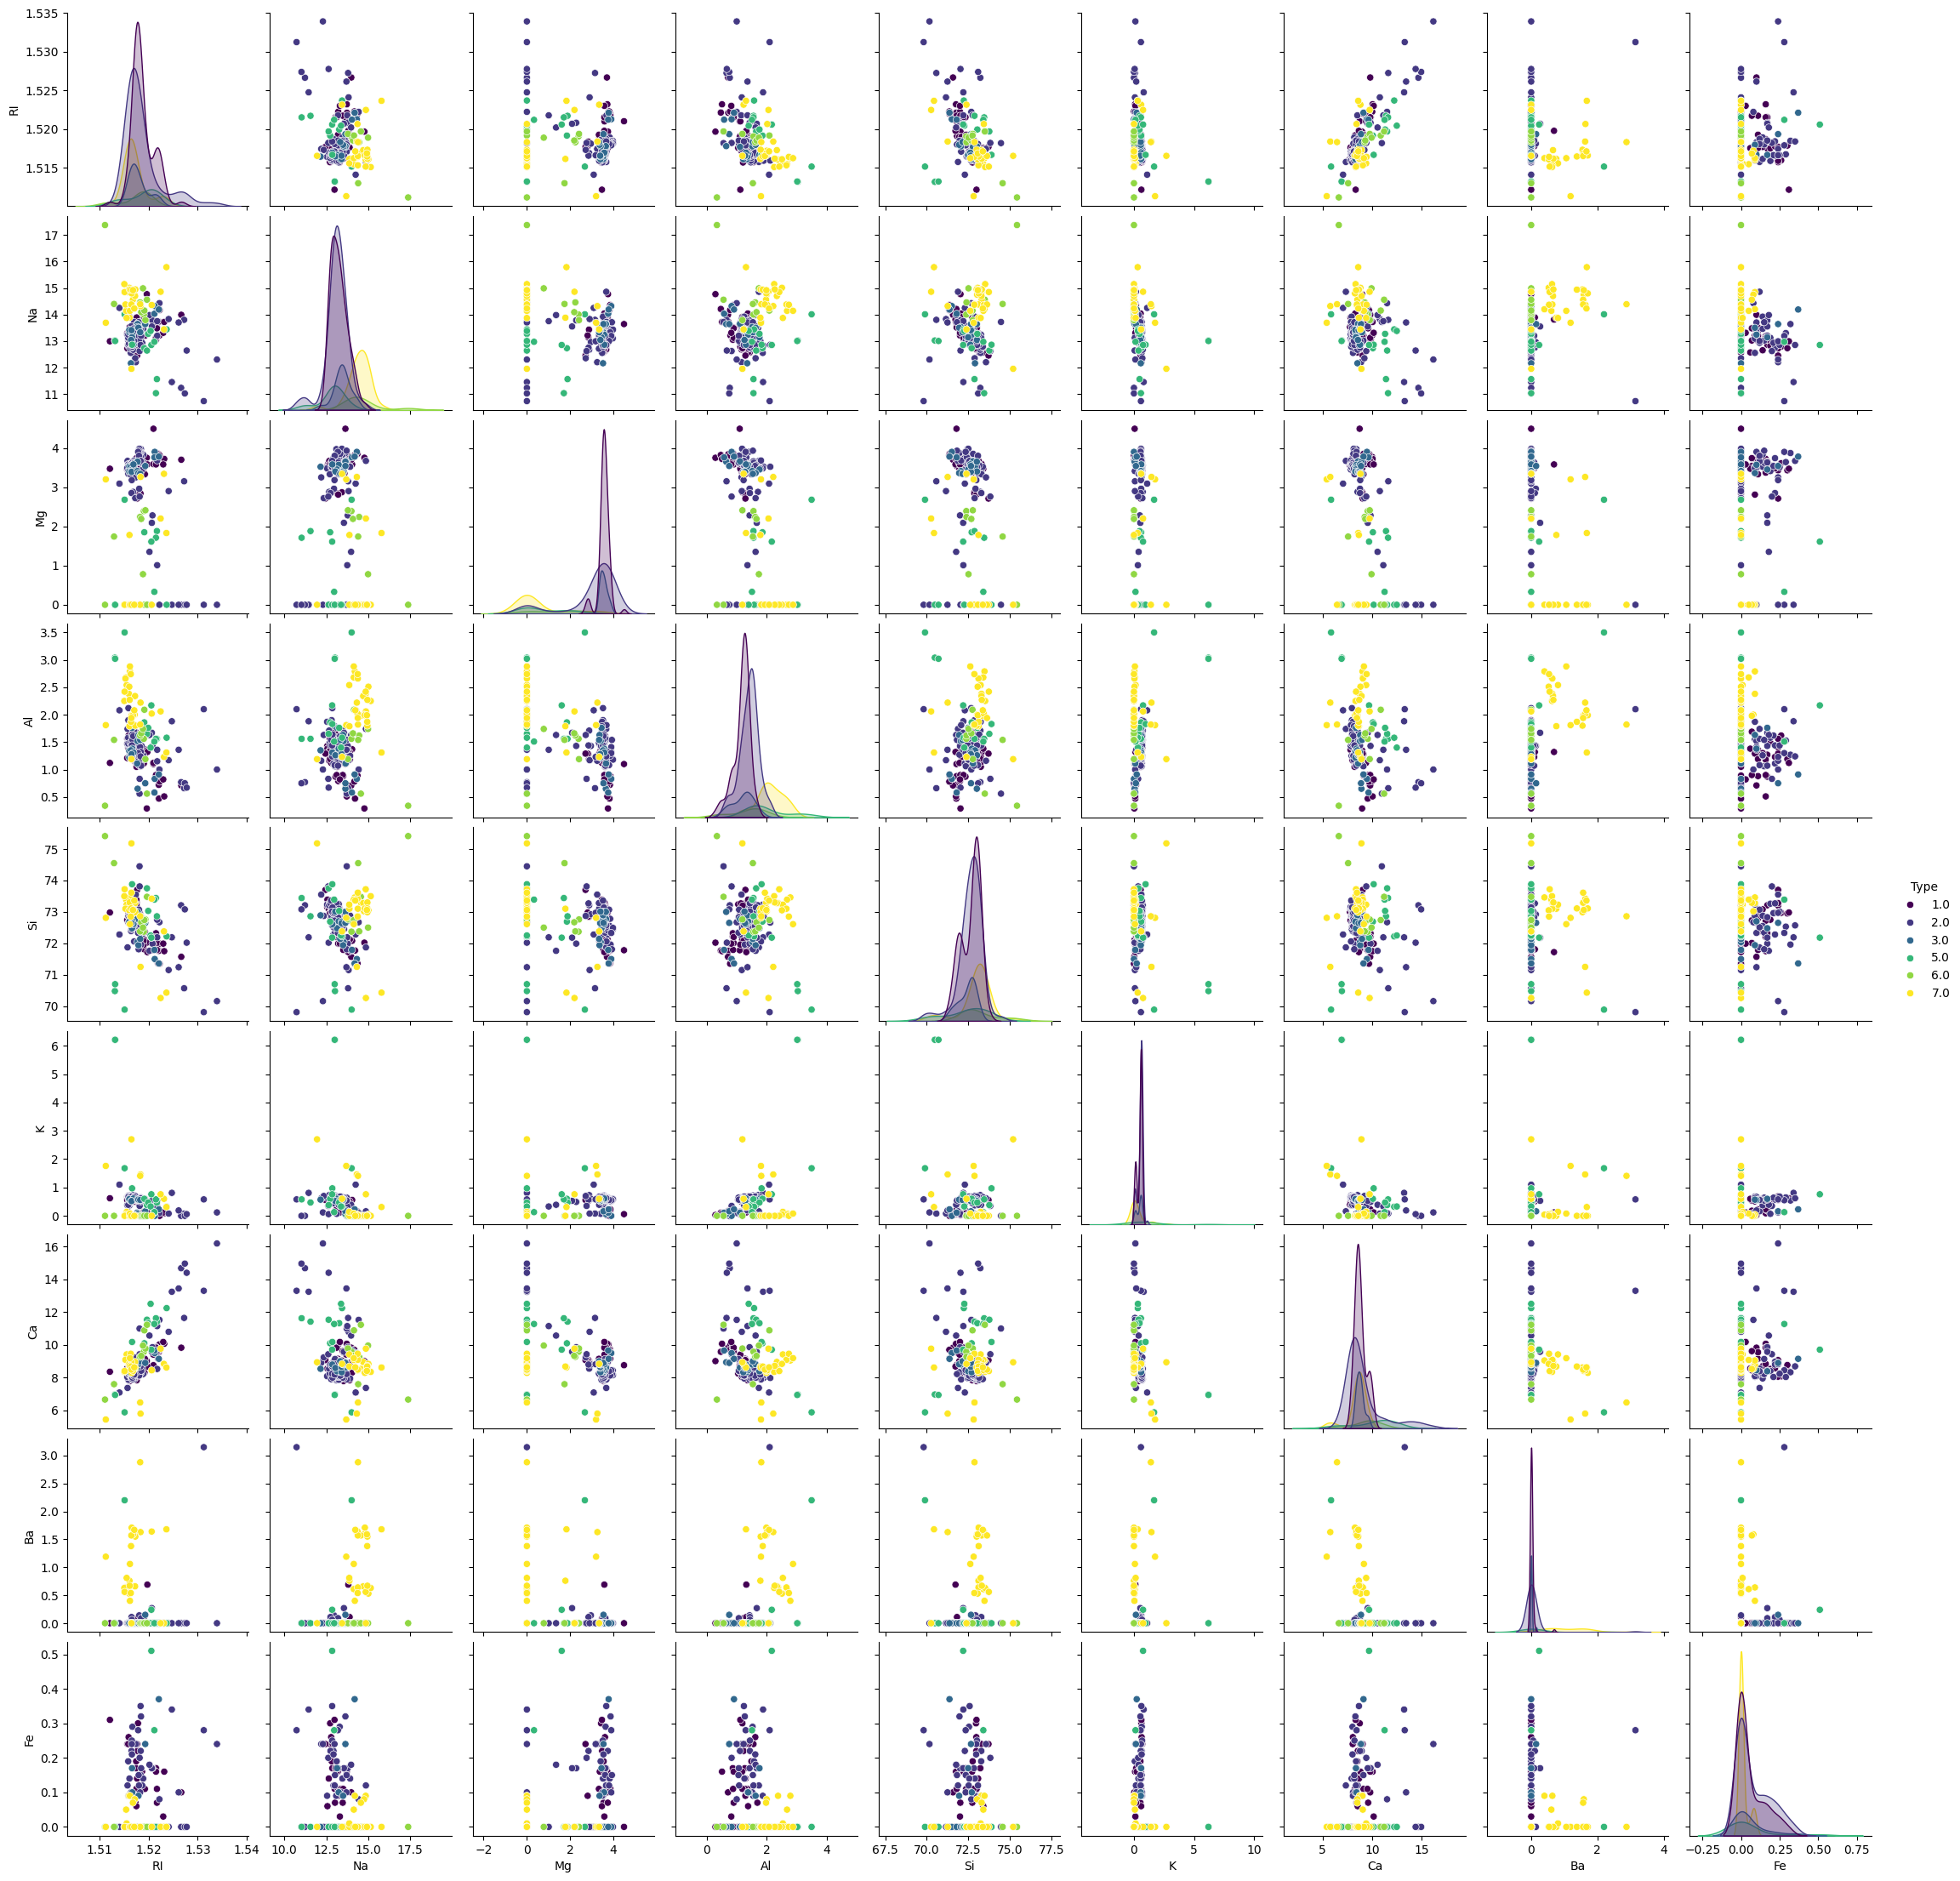

In [10]:
# Pairplot to check relationships between features
sns.pairplot(data, hue="Type", palette="viridis")
plt.show()


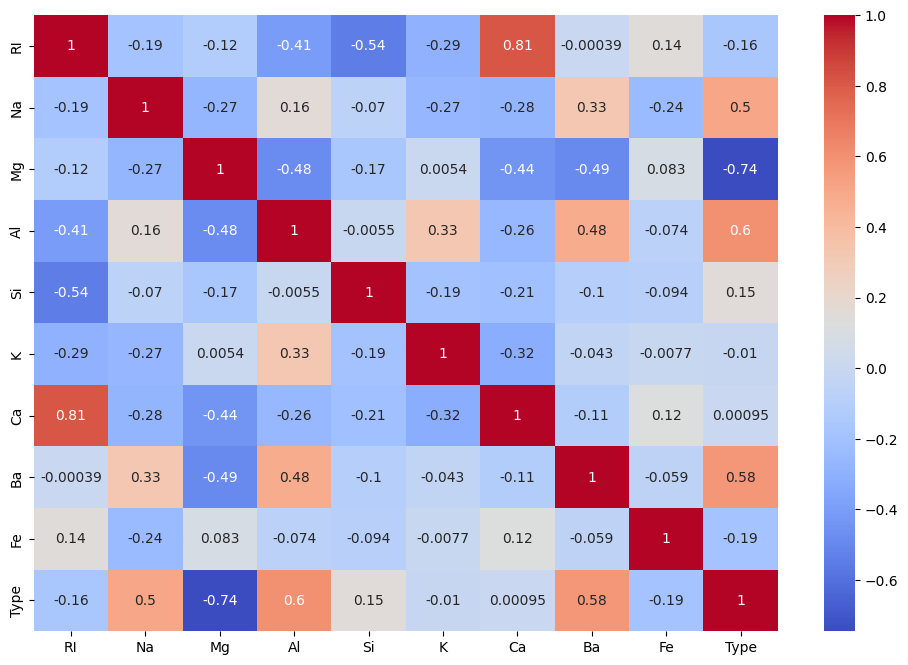

In [11]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.show()

In [12]:
# 3. Data Preprocessing
# Handling Missing Values (if any)
# Here we check for missing values and would normally decide on imputation or removal if needed.
# Since the dataset has no missing values, we can proceed.

In [25]:
data['Type'].fillna(data['Type'].mean(), inplace=True)

<ipython-input-25-e9c6237e319d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Type'].fillna(data['Type'].mean(), inplace=True)


In [26]:
# Feature Scaling
scaler = StandardScaler()
X = data.drop(columns=['Type'])
y = data['Type']
X_scaled = scaler.fit_transform(X)


In [27]:
y

,Type
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
209,7.0
210,7.0
211,7.0
212,7.0


In [28]:
scaler

StandardScaler()

In [30]:
# Handle Class Imbalance with SMOTE
# Applying SMOTE to balance the dataset if there is an imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

In [31]:
# 4. Random Forest Model Implementation
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [32]:
# Initialize and train Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42, n_estimators=100)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [33]:
# Evaluate on test data
y_pred = rf_classifier.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9239130434782609
Classification Report:
               precision    recall  f1-score   support

         1.0       0.87      0.76      0.81        17
         2.0       0.85      0.89      0.87        19
         3.0       0.83      1.00      0.91        10
         5.0       1.00      1.00      1.00        14
         6.0       1.00      1.00      1.00        14
         7.0       1.00      0.94      0.97        18

    accuracy                           0.92        92
   macro avg       0.93      0.93      0.93        92
weighted avg       0.93      0.92      0.92        92

Confusion Matrix:
 [[13  2  2  0  0  0]
 [ 2 17  0  0  0  0]
 [ 0  0 10  0  0  0]
 [ 0  0  0 14  0  0]
 [ 0  0  0  0 14  0]
 [ 0  1  0  0  0 17]]


In [38]:
# 5. Bagging and Boosting Methods
# Bagging with Random Forest as the base estimator

In [37]:
bagging_classifier = BaggingClassifier(estimator=RandomForestClassifier(), n_estimators=100, random_state=42)
bagging_classifier.fit(X_train, y_train)
y_bagging_pred = bagging_classifier.predict(X_test)

In [39]:
# Boosting with AdaBoost
boosting_classifier = AdaBoostClassifier(estimator=RandomForestClassifier(), n_estimators=100, random_state=42)
boosting_classifier.fit(X_train, y_train)
y_boosting_pred = boosting_classifier.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [40]:
# Evaluation of Bagging
print("Bagging - Accuracy:", accuracy_score(y_test, y_bagging_pred))
print("Bagging - Classification Report:\n", classification_report(y_test, y_bagging_pred))

Bagging - Accuracy: 0.9456521739130435
Bagging - Classification Report:
               precision    recall  f1-score   support

         1.0       0.93      0.82      0.88        17
         2.0       0.90      0.95      0.92        19
         3.0       0.83      1.00      0.91        10
         5.0       1.00      1.00      1.00        14
         6.0       1.00      1.00      1.00        14
         7.0       1.00      0.94      0.97        18

    accuracy                           0.95        92
   macro avg       0.94      0.95      0.95        92
weighted avg       0.95      0.95      0.95        92



In [41]:
# Evaluation of Boosting
print("Boosting - Accuracy:", accuracy_score(y_test, y_boosting_pred))
print("Boosting - Classification Report:\n", classification_report(y_test, y_boosting_pred))

Boosting - Accuracy: 0.9239130434782609
Boosting - Classification Report:
               precision    recall  f1-score   support

         1.0       0.82      0.82      0.82        17
         2.0       0.89      0.84      0.86        19
         3.0       0.83      1.00      0.91        10
         5.0       1.00      1.00      1.00        14
         6.0       1.00      1.00      1.00        14
         7.0       1.00      0.94      0.97        18

    accuracy                           0.92        92
   macro avg       0.92      0.94      0.93        92
weighted avg       0.93      0.92      0.92        92



# Additional Notes:



# (1)Explain Bagging and Boosting methods. How is it different from each other?

# Bagging (Bootstrap Aggregating)

Definition: Bagging is an ensemble method that aims to reduce the variance of a model by training multiple versions of it on different subsets of the data, created by sampling with replacement.

Process:

It creates several random samples (bootstraps) from the original dataset, each sample the same size as the original but containing duplicates.

Each model (e.g., decision trees) is trained independently on its unique bootstrap sample.

The final prediction is obtained by averaging predictions (for regression) or taking a majority vote (for classification) across the ensemble.

Benefit: Bagging helps reduce overfitting by averaging out the errors of individual models, especially useful for high-variance models like decision trees.

Example: Random Forest is a popular bagging method that builds an ensemble of decision trees on random subsets of features and data samples.

# Boosting

Definition: Boosting is an ensemble method that aims to reduce bias by sequentially training models, with each model focusing on correcting the errors of the previous one.

Process:

It begins by training an initial model on the full dataset.

The second model is trained to focus on the errors made by the first model, often by assigning higher weights to misclassified examples.

This process continues for several rounds, with each model in the sequence improving upon the performance of the previous one.

Benefit: Boosting often achieves high predictive accuracy by focusing on hard-to-learn cases, though it can be more prone to overfitting if the models become too complex.

Examples: AdaBoost, Gradient Boosting, and XGBoost are common boosting algorithms.

# (2)Explain how to handle imbalance in the data.

Class imbalance occurs when certain classes are significantly underrepresented compared to others. Handling it is essential in classification tasks to prevent models from being biased toward the majority class. Here are some common approaches:

# Data-Level Approaches

Resampling Techniques:

Oversampling: This technique increases the instances of the minority class by duplicating or creating synthetic samples.

Common methods include:

Random Oversampling: Randomly duplicates examples from the minority class.

SMOTE (Synthetic Minority Over-sampling Technique): Generates synthetic data points for the minority class by interpolating between existing samples.

Undersampling: Reduces the number of samples from the majority class to balance the dataset. It’s effective but may result in loss of information.

Common methods include:

Random Undersampling: Randomly removes examples from the majority class.

Tomek Links: Removes samples from the majority class that are close to samples in the minority class, helping define boundaries more clearly.

Creating Synthetic Data:

Techniques like SMOTE and ADASYN (Adaptive Synthetic Sampling) create synthetic samples for the minority class to improve representation, often achieving better results than simple duplication.


# Algorithm-Level Approaches

Class Weight Adjustment:

Many models (e.g., Logistic Regression, Decision Trees) allow setting a class_weight parameter. This assigns higher weight to the minority class, effectively “telling” the model to pay more attention to it.

In scikit-learn, setting class_weight='balanced' automatically adjusts weights based on class frequencies.

syntax:

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(class_weight='balanced')

rf.fit(X_train, y_train)

# Cost-Sensitive Learning:

Instead of changing the data, cost-sensitive learning applies a penalty to the model for misclassifying the minority class, which encourages the model to improve on the minority class predictions.